# Replicating the University of Malysia Paper.  

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


## University of Malaysia Data

In [2]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/ch4_2015-2021.xlsx"

malaysia_emissions_df = pd.read_excel(filepath)

In [3]:
# Selecting 2020 columns
malaysia_2020 = malaysia_emissions_df[["iso3_country","country_name", "tCH4_2020"]].copy()

In [4]:
malaysia_2020

,iso3_country,country_name,tCH4_2020
0,BGD,Bangladesh,2.106781e+06
1,BRA,Brazil,4.902874e+05
2,CHN,China,6.402353e+06
3,ESP,Spain,1.305461e+04
4,IDN,Indonesia,1.188195e+06
5,IND,India,7.599764e+06
6,IRN,Iran (Islamic Republic of),9.600254e+04
7,ITA,Italy,5.101547e+04
8,JPN,Japan,2.835167e+05
9,KHM,Cambodia,6.412802e+05


## FAOSTAT Data 2019

In [5]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/emissions_csv_fao_emiss_csv_ch4_fao_2015_2019_tonnes.xlsx"

faostat_emissions_df = pd.read_excel(filepath)

In [6]:
faostat_2019 = faostat_emissions_df[['code', 'country', 'country_fao', 2019]].copy()

In [7]:
faostat_2019

,code,country,country_fao,2019
0,BGD,Bangladesh,Bangladesh,1144745.4
1,BRA,Brazil,Brazil,111084.8
2,CHN,China,"China, mainland",5214454.7
3,ESP,Spain,Spain,52098.5
4,IDN,Indonesia,Indonesia,2257604.3
5,IND,India,India,4621416.8
6,IRN,Iran (Islamic Republic of),Iran (Islamic Republic of),96103.4
7,ITA,Italy,Italy,110895.1
8,JPN,Japan,Japan,320581.8
9,KHM,Cambodia,Cambodia,468378.9


In [8]:
faostat_2019.rename(columns={"code": "iso3_country"}, inplace =True)

## Merging Data on Iso3 Country Code

In [9]:
merged2020_df = faostat_2019.merge(malaysia_2020, on='iso3_country', how='left', sort=False)

In [10]:
merged2020_df

,iso3_country,country,country_fao,2019,country_name,tCH4_2020
0,BGD,Bangladesh,Bangladesh,1144745.4,Bangladesh,2.106781e+06
1,BRA,Brazil,Brazil,111084.8,Brazil,4.902874e+05
2,CHN,China,"China, mainland",5214454.7,China,6.402353e+06
3,ESP,Spain,Spain,52098.5,Spain,1.305461e+04
4,IDN,Indonesia,Indonesia,2257604.3,Indonesia,1.188195e+06
5,IND,India,India,4621416.8,India,7.599764e+06
6,IRN,Iran (Islamic Republic of),Iran (Islamic Republic of),96103.4,Iran (Islamic Republic of),9.600254e+04
7,ITA,Italy,Italy,110895.1,Italy,5.101547e+04
8,JPN,Japan,Japan,320581.8,Japan,2.835167e+05
9,KHM,Cambodia,Cambodia,468378.9,Cambodia,6.412802e+05


### Calculate difference in Tonnes Between the Estimates

In [11]:
# Calculate Difference in tons
merged2020_df['diff_2020'] = merged2020_df[2019] - merged2020_df['tCH4_2020']




### Calculating the Percent Differences Between the Estimates

In [12]:
merged2020_df['abs_percent_diff_2020'] = (abs((merged2020_df[2019] - merged2020_df['tCH4_2020']))/(merged2020_df[2019] + merged2020_df["tCH4_2020"])/2)*100

merged2020_df['relative_percent_diff_2020'] = (merged2020_df[2019] - merged2020_df['tCH4_2020'])/(merged2020_df[2019])*100



In [13]:
merged2020_df

,iso3_country,country,country_fao,2019,country_name,tCH4_2020,diff_2020,abs_percent_diff_2020,relative_percent_diff_2020
0,BGD,Bangladesh,Bangladesh,1144745.4,Bangladesh,2.106781e+06,-9.620360e+05,14.793604,-84.039294
1,BRA,Brazil,Brazil,111084.8,Brazil,4.902874e+05,-3.792026e+05,31.528112,-341.363191
2,CHN,China,"China, mainland",5214454.7,China,6.402353e+06,-1.187898e+06,5.112843,-22.780874
3,ESP,Spain,Spain,52098.5,Spain,1.305461e+04,3.904389e+04,29.963187,74.942454
4,IDN,Indonesia,Indonesia,2257604.3,Indonesia,1.188195e+06,1.069409e+06,15.517575,47.369198
5,IND,India,India,4621416.8,India,7.599764e+06,-2.978347e+06,12.185184,-64.446615
6,IRN,Iran (Islamic Republic of),Iran (Islamic Republic of),96103.4,Iran (Islamic Republic of),9.600254e+04,1.008569e+02,0.026250,0.104946
7,ITA,Italy,Italy,110895.1,Italy,5.101547e+04,5.987963e+04,18.491575,53.996641
8,JPN,Japan,Japan,320581.8,Japan,2.835167e+05,3.706513e+04,3.067805,11.561831
9,KHM,Cambodia,Cambodia,468378.9,Cambodia,6.412802e+05,-1.729013e+05,7.790740,-36.914836


### Tonnes CH4 FAOSTAT - TRACE Plot

<AxesSubplot:ylabel='Country Name'>

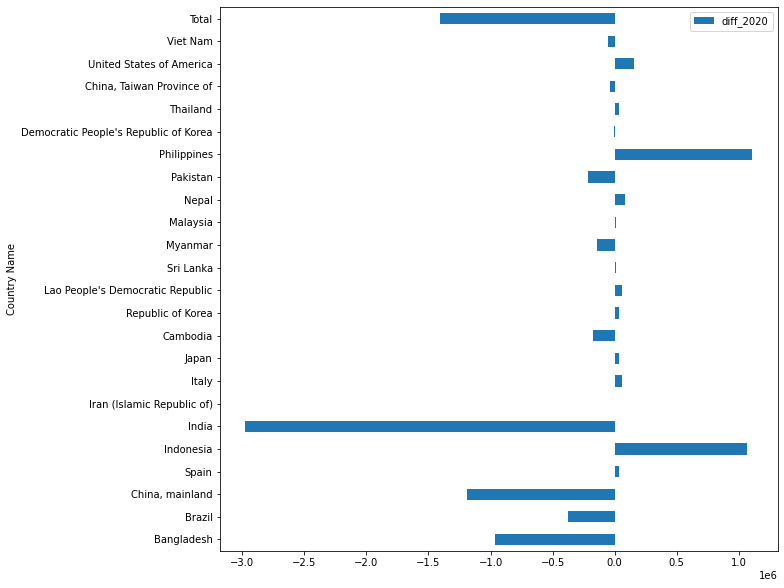

In [14]:
merged2020_df.plot(kind = "barh", x = 'country_fao', y = ["diff_2020"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize = (10,10))

### Percent Difference FAOSTAT - TRACE

<AxesSubplot:ylabel='Country Name'>

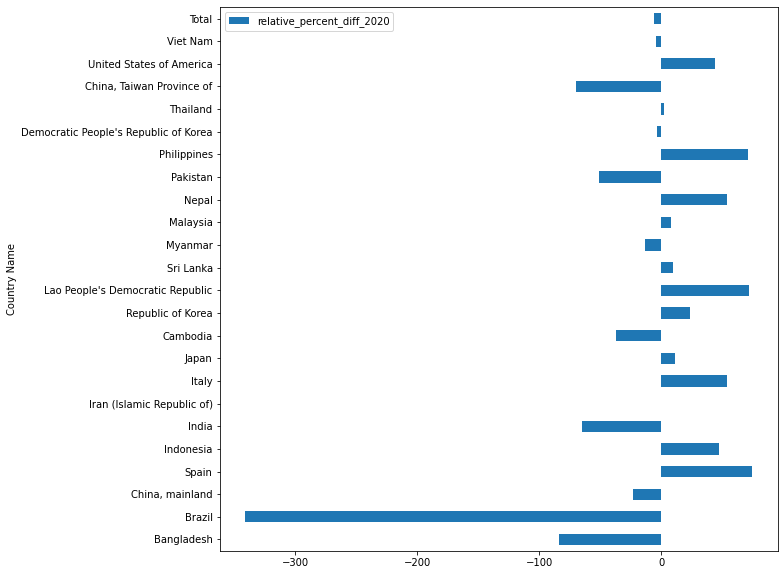

In [15]:
merged2020_df.plot(kind = "barh", x = 'country_fao', y = ["relative_percent_diff_2020"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize=(10,10))

## Recreating the Malysia Paper with 2018 Data.  

### University of Malaysia Data

In [16]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/ch4_2015-2021.xlsx"

malaysia_emissions_df = pd.read_excel(filepath)

In [17]:
# Selecting 2020 columns
malaysia_2020 = malaysia_emissions_df[["iso3_country","country_name", "tCH4_2020"]].copy()

In [18]:
malaysia_2020

,iso3_country,country_name,tCH4_2020
0,BGD,Bangladesh,2.106781e+06
1,BRA,Brazil,4.902874e+05
2,CHN,China,6.402353e+06
3,ESP,Spain,1.305461e+04
4,IDN,Indonesia,1.188195e+06
5,IND,India,7.599764e+06
6,IRN,Iran (Islamic Republic of),9.600254e+04
7,ITA,Italy,5.101547e+04
8,JPN,Japan,2.835167e+05
9,KHM,Cambodia,6.412802e+05


## FAOSTAT Data 2018

In [19]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/emissions_csv_fao_emiss_csv_ch4_fao_2015_2019_tonnes.xlsx"

faostat_emissions_df = pd.read_excel(filepath)

In [20]:
faostat_2018 = faostat_emissions_df[['code', 'country', 'country_fao', 2018]].copy()

In [21]:
faostat_2018

,code,country,country_fao,2018
0,BGD,Bangladesh,Bangladesh,1144591.0
1,BRA,Brazil,Brazil,121615.2
2,CHN,China,"China, mainland",5302173.1
3,ESP,Spain,Spain,52925.0
4,IDN,Indonesia,Indonesia,2405613.8
5,IND,India,India,4661154.9
6,IRN,Iran (Islamic Republic of),Iran (Islamic Republic of),93936.6
7,ITA,Italy,Italy,109463.8
8,JPN,Japan,Japan,322245.0
9,KHM,Cambodia,Cambodia,479362.7


In [22]:
faostat_2018.rename(columns={"code": "iso3_country"}, inplace =True)

## Merging Data on Iso3 Country Code

In [23]:
merged2020_df = faostat_2018.merge(malaysia_2020, on='iso3_country', how='left', sort=False)

In [24]:
merged2020_df

,iso3_country,country,country_fao,2018,country_name,tCH4_2020
0,BGD,Bangladesh,Bangladesh,1144591.0,Bangladesh,2.106781e+06
1,BRA,Brazil,Brazil,121615.2,Brazil,4.902874e+05
2,CHN,China,"China, mainland",5302173.1,China,6.402353e+06
3,ESP,Spain,Spain,52925.0,Spain,1.305461e+04
4,IDN,Indonesia,Indonesia,2405613.8,Indonesia,1.188195e+06
5,IND,India,India,4661154.9,India,7.599764e+06
6,IRN,Iran (Islamic Republic of),Iran (Islamic Republic of),93936.6,Iran (Islamic Republic of),9.600254e+04
7,ITA,Italy,Italy,109463.8,Italy,5.101547e+04
8,JPN,Japan,Japan,322245.0,Japan,2.835167e+05
9,KHM,Cambodia,Cambodia,479362.7,Cambodia,6.412802e+05


### Calculate difference in Tonnes Between the Estimates

In [25]:
# Calculate Difference in tons
merged2020_df['diff_2020'] = merged2020_df[2018] - merged2020_df['tCH4_2020']




### Calculating the Percent Differences Between the Estimates

In [26]:
merged2020_df['abs_percent_diff_2020'] = (abs((merged2020_df[2018] - merged2020_df['tCH4_2020']))/(merged2020_df[2018] + merged2020_df["tCH4_2020"])/2)*100

merged2020_df['relative_percent_diff_2020'] = (merged2020_df[2018] - merged2020_df['tCH4_2020'])/(merged2020_df[2018])*100



In [27]:
merged2020_df

,iso3_country,country,country_fao,2018,country_name,tCH4_2020,diff_2020,abs_percent_diff_2020,relative_percent_diff_2020
0,BGD,Bangladesh,Bangladesh,1144591.0,Bangladesh,2.106781e+06,-9.621904e+05,14.796680,-84.064120
1,BRA,Brazil,Brazil,121615.2,Brazil,4.902874e+05,-3.686722e+05,30.125073,-303.146497
2,CHN,China,"China, mainland",5302173.1,China,6.402353e+06,-1.100180e+06,4.699806,-20.749605
3,ESP,Spain,Spain,52925.0,Spain,1.305461e+04,3.987039e+04,30.214181,75.333763
4,IDN,Indonesia,Indonesia,2405613.8,Indonesia,1.188195e+06,1.217419e+06,16.937719,50.607398
5,IND,India,India,4661154.9,India,7.599764e+06,-2.938609e+06,11.983640,-63.044646
6,IRN,Iran (Islamic Republic of),Iran (Islamic Republic of),93936.6,Iran (Islamic Republic of),9.600254e+04,-2.065943e+03,0.543843,-2.199295
7,ITA,Italy,Italy,109463.8,Italy,5.101547e+04,5.844833e+04,18.210554,53.395122
8,JPN,Japan,Japan,322245.0,Japan,2.835167e+05,3.872833e+04,3.196664,12.018286
9,KHM,Cambodia,Cambodia,479362.7,Cambodia,6.412802e+05,-1.619175e+05,7.224313,-33.777660


### Tonnes CH4 FAOSTAT - TRACE Plot

<AxesSubplot:ylabel='Country Name'>

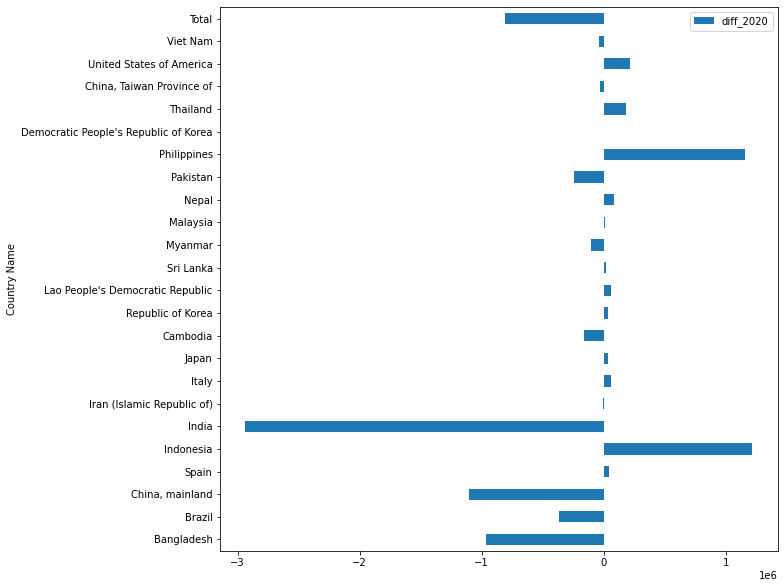

In [28]:
merged2020_df.plot(kind = "barh", x = 'country_fao', y = ["diff_2020"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize = (10,10))

### Percent Difference FAOSTAT - TRACE

<AxesSubplot:ylabel='Country Name'>

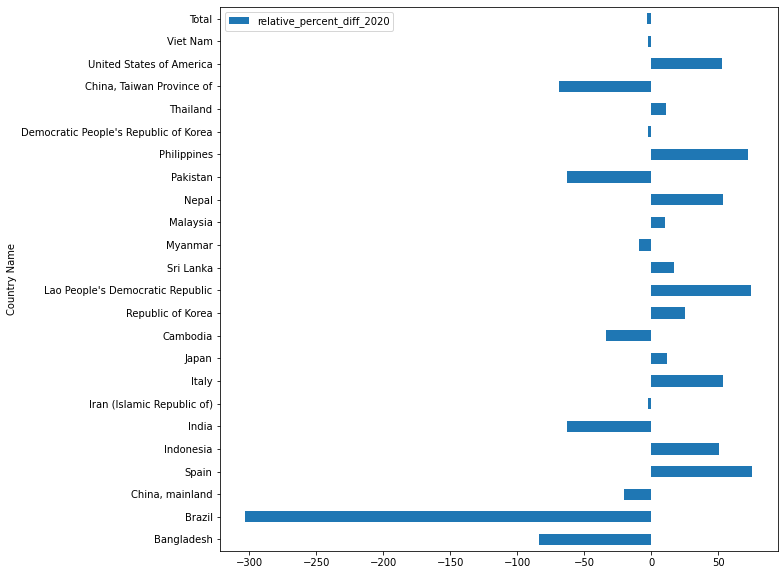

In [29]:
merged2020_df.plot(kind = "barh", x = 'country_fao', y = ["relative_percent_diff_2020"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize=(10,10))

## Recreating the Malysia Paper same year

### University of Malaysia Data

In [30]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/ch4_2015-2021.xlsx"

malaysia_emissions_df = pd.read_excel(filepath)

In [31]:
# Selecting 2020 columns
malaysia_2018 = malaysia_emissions_df[["iso3_country","country_name", "tCH4_2018"]].copy()

In [32]:
malaysia_2018

,iso3_country,country_name,tCH4_2018
0,BGD,Bangladesh,2.141231e+06
1,BRA,Brazil,3.717030e+05
2,CHN,China,5.413962e+06
3,ESP,Spain,1.405410e+04
4,IDN,Indonesia,1.176982e+06
5,IND,India,6.589798e+06
6,IRN,Iran (Islamic Republic of),8.875744e+04
7,ITA,Italy,4.469902e+04
8,JPN,Japan,1.548252e+05
9,KHM,Cambodia,5.592610e+05


## FAOSTAT Data 2018

In [33]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/emissions_csv_fao_emiss_csv_ch4_fao_2015_2019_tonnes.xlsx"

faostat_emissions_df = pd.read_excel(filepath)

In [34]:
faostat_2018 = faostat_emissions_df[['code', 'country', 'country_fao', 2018]].copy()

In [35]:
faostat_2018

,code,country,country_fao,2018
0,BGD,Bangladesh,Bangladesh,1144591.0
1,BRA,Brazil,Brazil,121615.2
2,CHN,China,"China, mainland",5302173.1
3,ESP,Spain,Spain,52925.0
4,IDN,Indonesia,Indonesia,2405613.8
5,IND,India,India,4661154.9
6,IRN,Iran (Islamic Republic of),Iran (Islamic Republic of),93936.6
7,ITA,Italy,Italy,109463.8
8,JPN,Japan,Japan,322245.0
9,KHM,Cambodia,Cambodia,479362.7


In [36]:
faostat_2018.rename(columns={"code": "iso3_country"}, inplace =True)

## Merging Data on Iso3 Country Code

In [37]:
merged2018_df = faostat_2018.merge(malaysia_2018, on='iso3_country', how='left', sort=False)

In [38]:
merged2018_df

,iso3_country,country,country_fao,2018,country_name,tCH4_2018
0,BGD,Bangladesh,Bangladesh,1144591.0,Bangladesh,2.141231e+06
1,BRA,Brazil,Brazil,121615.2,Brazil,3.717030e+05
2,CHN,China,"China, mainland",5302173.1,China,5.413962e+06
3,ESP,Spain,Spain,52925.0,Spain,1.405410e+04
4,IDN,Indonesia,Indonesia,2405613.8,Indonesia,1.176982e+06
5,IND,India,India,4661154.9,India,6.589798e+06
6,IRN,Iran (Islamic Republic of),Iran (Islamic Republic of),93936.6,Iran (Islamic Republic of),8.875744e+04
7,ITA,Italy,Italy,109463.8,Italy,4.469902e+04
8,JPN,Japan,Japan,322245.0,Japan,1.548252e+05
9,KHM,Cambodia,Cambodia,479362.7,Cambodia,5.592610e+05


### Calculate difference in Tonnes Between the Estimates

In [39]:
# Calculate Difference in tons
merged2018_df['diff_2018'] = merged2018_df[2018] - merged2018_df['tCH4_2018']




### Calculating the Percent Differences Between the Estimates

In [40]:
merged2018_df['abs_percent_diff_2018'] = (abs((merged2018_df[2018] - merged2018_df['tCH4_2018']))/(merged2018_df[2018] + merged2018_df["tCH4_2018"])/2)*100

merged2018_df['relative_percent_diff_2018'] = (merged2018_df[2018] - merged2018_df['tCH4_2018'])/(merged2018_df[2018])*100



In [41]:
merged2018_df

,iso3_country,country,country_fao,2018,country_name,tCH4_2018,diff_2018,abs_percent_diff_2018,relative_percent_diff_2018
0,BGD,Bangladesh,Bangladesh,1144591.0,Bangladesh,2.141231e+06,-9.966395e+05,15.165759,-87.073857
1,BRA,Brazil,Brazil,121615.2,Brazil,3.717030e+05,-2.500878e+05,25.347513,-205.638590
2,CHN,China,"China, mainland",5302173.1,China,5.413962e+06,-1.117892e+05,0.521593,-2.108366
3,ESP,Spain,Spain,52925.0,Spain,1.405410e+04,3.887090e+04,29.017189,73.445258
4,IDN,Indonesia,Indonesia,2405613.8,Indonesia,1.176982e+06,1.228632e+06,17.147238,51.073546
5,IND,India,India,4661154.9,India,6.589798e+06,-1.928643e+06,8.571022,-41.376939
6,IRN,Iran (Islamic Republic of),Iran (Islamic Republic of),93936.6,Iran (Islamic Republic of),8.875744e+04,5.179159e+03,1.417441,5.513463
7,ITA,Italy,Italy,109463.8,Italy,4.469902e+04,6.476478e+04,21.005319,59.165480
8,JPN,Japan,Japan,322245.0,Japan,1.548252e+05,1.674198e+05,17.546657,51.954183
9,KHM,Cambodia,Cambodia,479362.7,Cambodia,5.592610e+05,-7.989830e+04,3.846355,-16.667610


### Tonnes CH4 FAOSTAT - TRACE Plot

<AxesSubplot:ylabel='Country Name'>

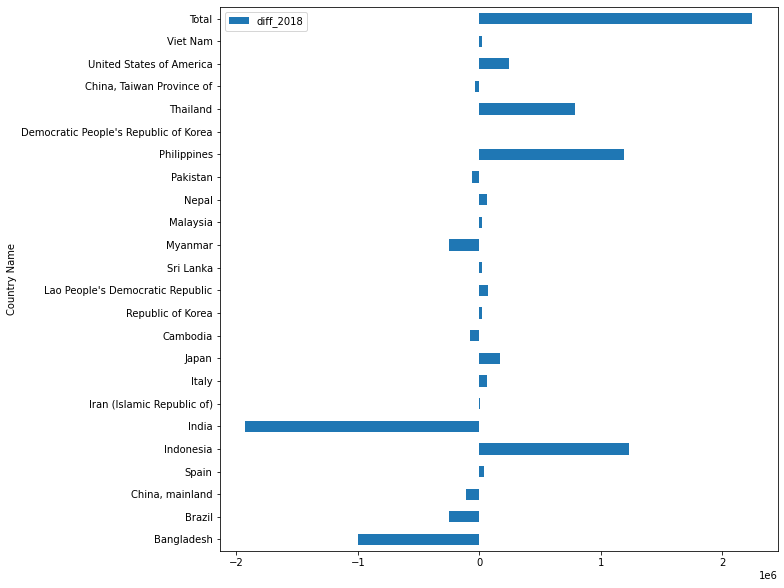

In [42]:
merged2018_df.plot(kind = "barh", x = 'country_fao', y = ["diff_2018"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize = (10,10))

### Percent Difference FAOSTAT - TRACE

<AxesSubplot:ylabel='Country Name'>

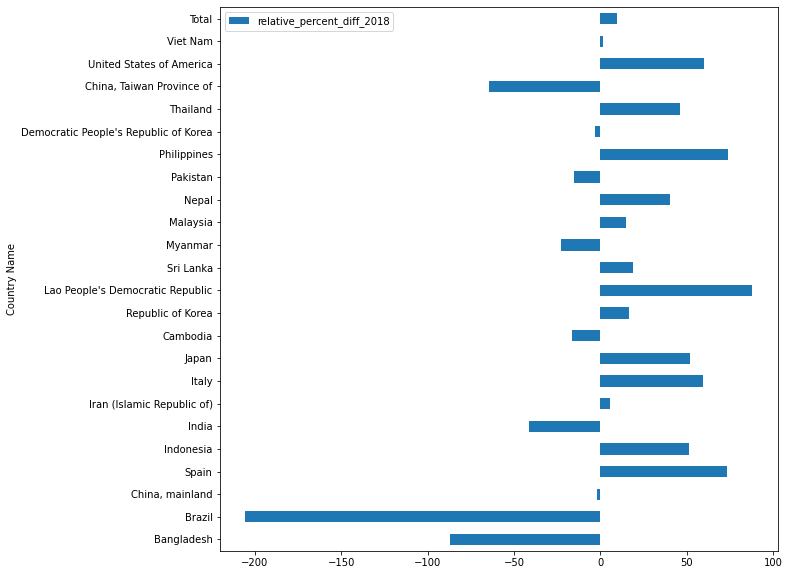

In [43]:
merged2018_df.plot(kind = "barh", x = 'country_fao', y = ["relative_percent_diff_2018"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize=(10,10))

### Impressions

I was not able to replicate the results exactly.  I reviewed the included paper to find that the university misleadingly rounded to three decimal places.  I did not manipulate the raw data.  

I found that the overall difference in reporting is only about 6 percent between 2019 and 2020.   The methodology is somewhat misleading as well, because when considering the previous 5 years of data demonstrated a consistent 3 percent difference.  When comparing the TRACE data to itself it does seem to show a significant increase between 2019 and 2020 emissions. I'll test this next  